In [19]:
import sys
sys.path.append("..")
import pickle

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import

In [21]:
results = pd.read_csv("output/bot_competition_by_granularity.csv")

In [22]:
results

,player1_granularity,player2_granularity,result,bot_depth,game_depth
0,3,3,-0.02587,1,1
1,3,5,-0.04602,1,1
2,3,7,-0.05820,1,1
3,3,10,-0.06870,1,1
4,5,3,-0.02698,1,1
5,5,5,-0.03927,1,1
6,5,7,-0.05017,1,1
7,5,10,-0.05343,1,1
8,7,3,-0.00982,1,1
9,7,5,-0.03474,1,1


# Clean

In [23]:
static_results = results\
    .loc[lambda x:x.bot_depth == 1]\
    .rename({'player1_granularity':'Player 1',
             'player2_granularity':'Player 2'}, axis = 1)\
    .pivot_table(columns = 'Player 2', index = 'Player 1', values = 'result')


In [24]:
dynamic_results = results\
    .loc[lambda x:x.bot_depth == 2]\
    .rename({'player1_granularity':'Player 1',
             'player2_granularity':'Player 2'}, axis = 1)\
    .pivot_table(columns = 'Player 2', index = 'Player 1', values = 'result')


# Heatmap

In [25]:
def plot_heatmap(df, output_fn):
    
    ax = sns.heatmap(df, annot=True, cmap = 'Blues_r', linewidth = 0.05)
    ax.set(xlabel="Player 2 Granularity", ylabel="Player 1 Granularity")
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.savefig(f'output/{output_fn}')

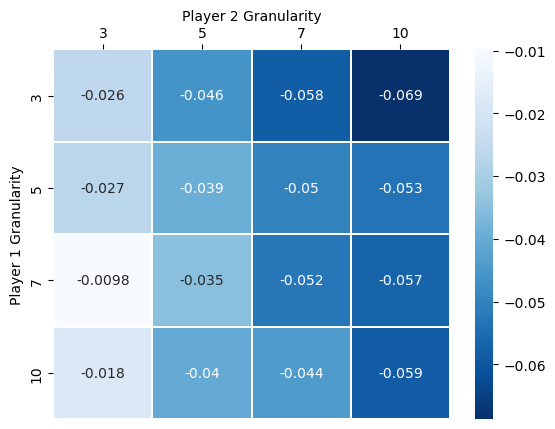

In [26]:
plot_heatmap(static_results, 'static_granularity_tests.png')

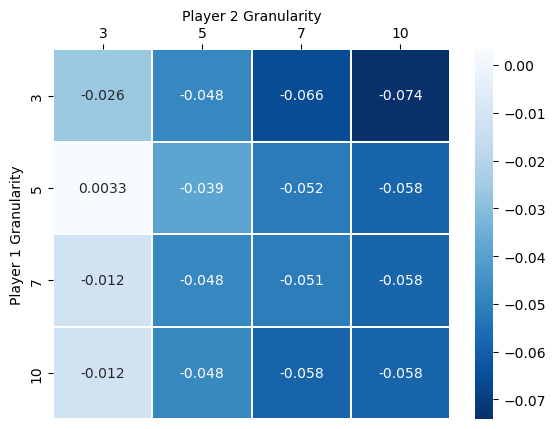

In [27]:
plot_heatmap(dynamic_results, 'dynamic_granularity_tests.png')

**Takeaways**
1. Gets darker (more favorable for Player 2) as you go left to right
2. Gets lighter (more favorable for Player 1) as you go top to down.

Conclusion: Higher granularity of the learened abstraction improves results (but there may be diminishing returns).